In [40]:
import anndata as ad
import numpy as np
import matplotlib.pyplot as plt
import pickle
import dynchro

In [41]:
%load_ext autoreload
%autoreload 2

# 1. scatter plots: celltypes and pseudotime

In [42]:
adata = ad.read_h5ad("figures/wildtype_start.h5ad")
irf8 = ad.read_h5ad("figures/irf8_start.h5ad")
gfi1 = ad.read_h5ad("figures/gfi1_start.h5ad")
both = ad.read_h5ad("figures/both_start.h5ad")

In [195]:
colors = ["#ffc800","#f6992d","#ed6a5a","#a75a5a","#60495a","#4c7680","#38a3a5","#7dba60","#c2d11b"]
colors = ["#F857B4", "#F86557", "#F8D157", "#B4F857", "#57F865", "#57F8D1", "#57B4F8", "#6557F8", "#D157F8"]
colors = ["#906DE3", "#DF6DE3", "#E36D99", "#E3906D", "#E3DF6D", "#99E36D", "#6DE390", "#6DE3DF", "#6D99E3"]
colors = ["#F3CB57", "#B3F357", "#57F363", "#57F3CB", "#57B3F3", "#6357F3", "#CB57F3", "#F357B3", "#F36357"]
colors = ["#EF69BA", "#EF7269", "#EFCB69", "#BAEF69", "#69EF72", "#69EFCB", "#69BAEF", "#7269EF", "#CB69EF"]

In [44]:
def get_colors(colors, labels):
    color_map = {label: colors[i] for i, label in enumerate(np.unique(labels))}
    translated_colors = np.array([color_map[c] for c in labels])

    handles, labels = get_color_legend(color_map)

    return translated_colors, handles, labels

def get_color_legend(color_map):
    handles = [
        plt.Line2D(
                [0], [0], marker='o', markerfacecolor=c, color = "k", 
                markersize = 9, lw = 0
            ) for c in color_map.values()
        ]
    labels = list(color_map.keys())
    return handles, labels

In [290]:
def plot_celltypes(adata, axes):
    xs = adata.obsm['X_dr'][:, 0]
    ys = adata.obsm['X_dr'][:, 1]
    labels = adata.obs['label'].values

    translated_colors, handles, labels = get_colors(colors, labels)

    ax = axes[0]

    ax.scatter(xs, ys, c=translated_colors,  s=75, edgecolors = 'k')
    ax.set_title("Cell types")

    ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
    # ax.set_xlabel("Flat tree plot")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.xaxis.set_label_coords(0.25, 0.95)
    ax.set_ylabel("")
    
    axes[1].axis('off')

    axes[1].legend(handles=handles, labels=labels, title="Cell Types", loc='best', frameon=False, fontsize="xx-small", title_fontsize="small")
    
    return ax

<Axes: title={'center': 'Cell types'}>

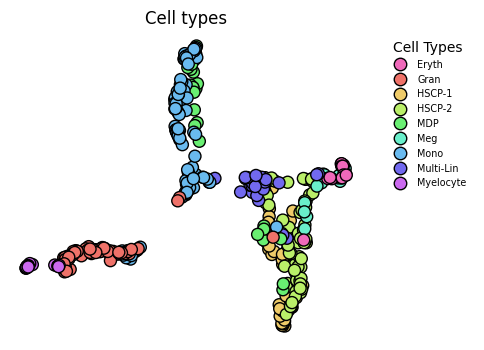

In [286]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 4), gridspec_kw={'width_ratios': [10, 2]})
axes[1].axis('off')
plot_celltypes(adata, axes)

<Axes: title={'center': 'Cell types'}>

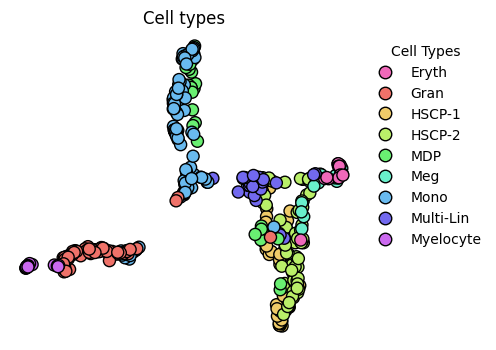

In [61]:
fig, ax = plt.subplots(figsize=(4.5, 4))
plot_celltypes(adata, ax)

<Axes: title={'center': 'Cell types'}>

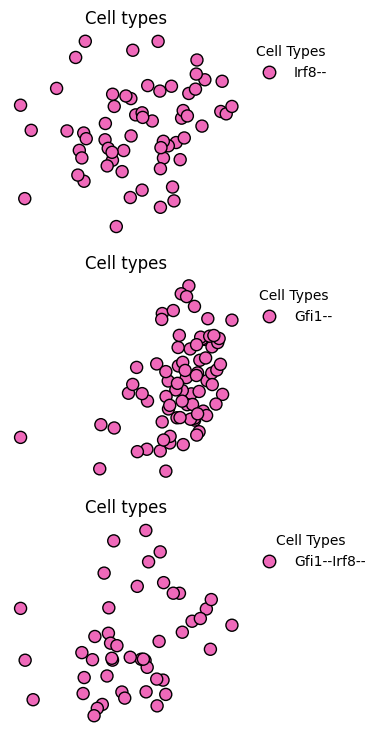

In [62]:
fig, ax = plt.subplots(nrows=3, figsize=(3, 9))
plot_celltypes(irf8, ax[0])
plot_celltypes(gfi1, ax[1])
plot_celltypes(both, ax[2])

In [269]:
import seaborn as sns
import matplotlib.colors as clr
import matplotlib as mpl
def plot_pseudotime(adata, axes, title):

    xs = adata.obsm['X_dr'][:, 0]
    ys = adata.obsm['X_dr'][:, 1]
    colors = adata.obs['pseudotime'].values
    norm_colors = (colors - colors.min()) / (colors.max() - colors.min())

    blue_reversed = plt.get_cmap('Blues_r')
    tints = ["#69BAEF", "#80C2F1", "#95CBF3", "#A9D3F5", "#BBDCF7", "#CDE5F9", "#DEEDFB", "#EEF6FD", "#FFFFFF"]
    shades = ["#4DA2D5", "#2C8ABC", "#0073A3", "#005D8B", "#004774"][::-1]
    blues = shades +tints

    # color_saturation = ["#D4FFFF", "#BCEDFA", "#A4DAF2", "#8CC6E7", "#73B2DA", "#5B9DCA", "#4288B7", "#2773A3", "#005D8C"][::-1]
    palette = clr.LinearSegmentedColormap.from_list("custom", blues, N=256)

    ax = axes[0]
    # norm = mpl.colors.Normalize(vmin=0, vmax=1)
    ax.scatter(xs, ys, c=norm_colors, cmap=palette, s=100, edgecolors = 'k')
    # cbar = axes[0].figure.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=palette), label='Pseudotime', orientation='vertical', fraction=0.03, ticks = [0, 1], pad=0.02, ax=axes[1])

    cmap = clr.LinearSegmentedColormap.from_list("custom", blues, N=256)
    norm = mpl.colors.Normalize(vmin=0, vmax=1)

    axes[1].axis('off')

    fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
                ax=axes[1], orientation='vertical', label='Pseudotime',
                fraction=0.75, shrink=0.75, ticks=[0, 1])

    ax.set_title(title)

    ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
    ax.set_xlabel("Flat tree plot")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.xaxis.set_label_coords(0.25, 0.95)
    ax.set_ylabel("")
    # plt.colorbar(scatter, label='Pseudotime', orientation='vertical', fraction=0.03, ticks = [0, 1], pad=0.02, ax=axes[1])

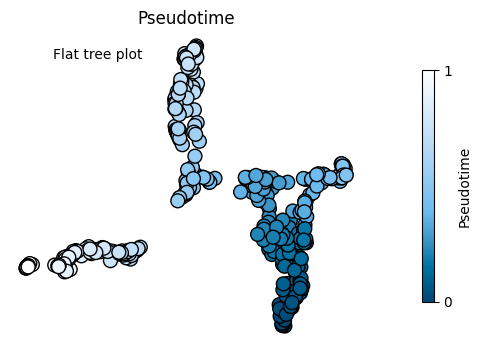

In [270]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 4), gridspec_kw={'width_ratios': [5, 1]})
plot_pseudotime(adata, axes, "Pseudotime")

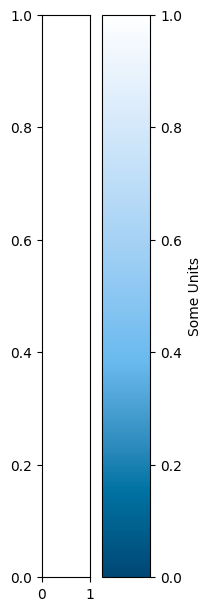

In [232]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(2, 6), layout='constrained')
tints = ["#69BAEF", "#80C2F1", "#95CBF3", "#A9D3F5", "#BBDCF7", "#CDE5F9", "#DEEDFB", "#EEF6FD", "#FFFFFF"]
shades = ["#4DA2D5", "#2C8ABC", "#0073A3", "#005D8B", "#004774"][::-1]
blues = shades + tints
cmap = clr.LinearSegmentedColormap.from_list("custom", blues, N=256)
norm = mpl.colors.Normalize(vmin=0, vmax=1)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=axes[1], orientation='vertical', label='Some Units')

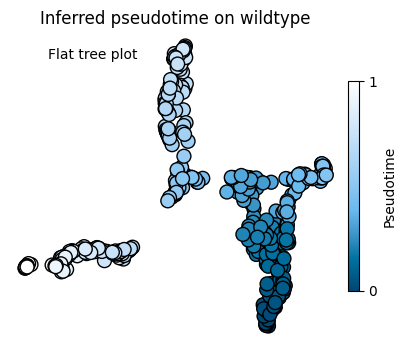

In [80]:
fig, ax = plt.subplots(figsize=(4.5, 4))
plot_pseudotime(adata, ax, "Inferred pseudotime on wildtype")

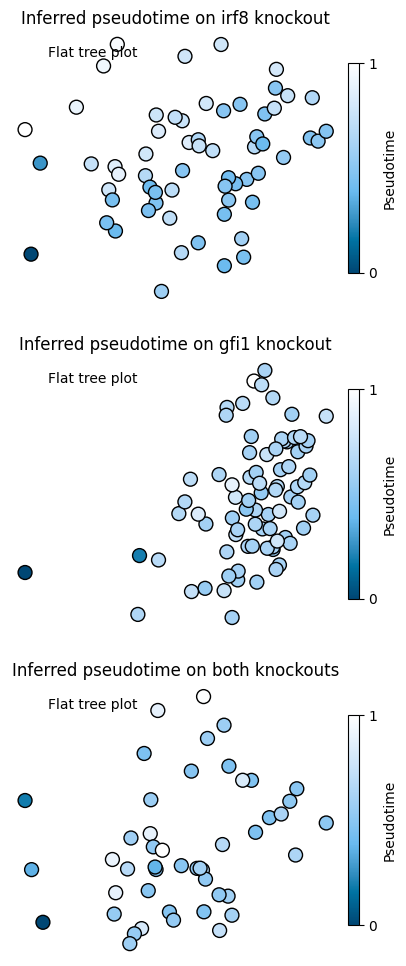

In [81]:
fig, ax = plt.subplots(nrows=3, figsize=(4.5, 12))
plot_pseudotime(irf8, ax[0], "Inferred pseudotime on irf8 knockout")
plot_pseudotime(gfi1, ax[1], "Inferred pseudotime on gfi1 knockout")
plot_pseudotime(both, ax[2], "Inferred pseudotime on both knockouts")

# 2. cost over pseudotime of alignments

## 2.1 individual plots

In [97]:
with open("figures/2_dynchro_warpings.pkl", "rb") as f:
    warpings = pickle.load(f)
    warping_irf8, warping_gfi1, warping_both = warpings

<Axes: title={'center': 'Average Cost on Path'}, xlabel='Pseudotime', ylabel='Average Cost'>

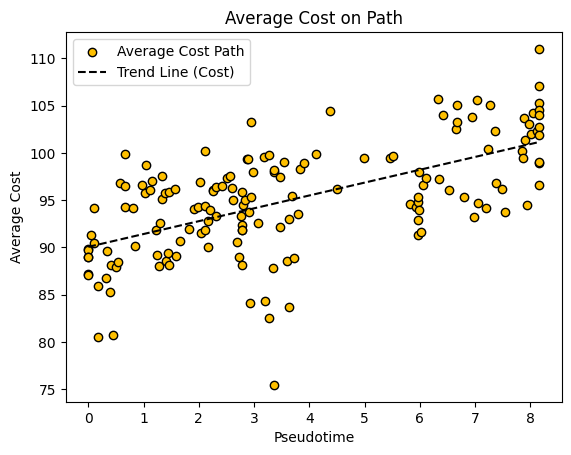

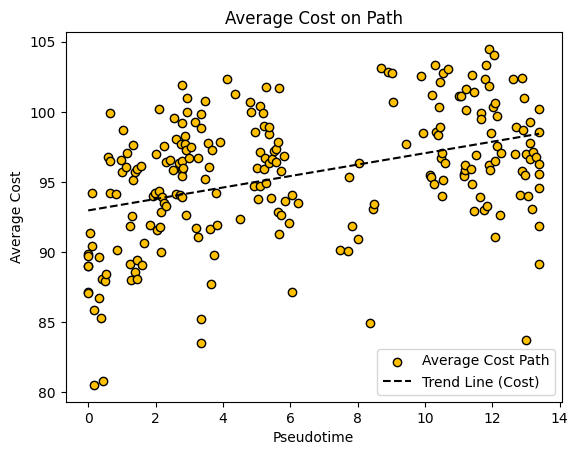

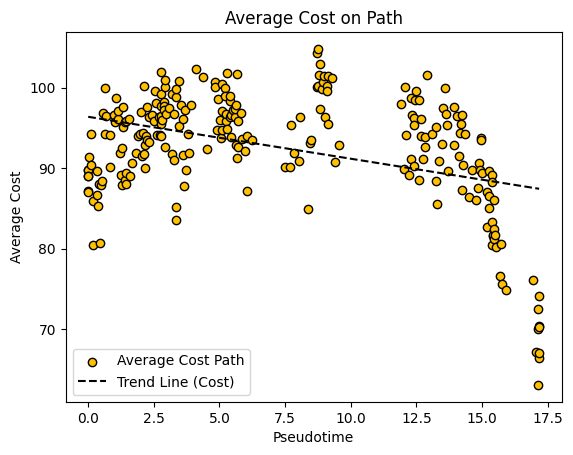

In [98]:
# plot warping of irf8 to granulocytic and monocytic lineages

#warping_irf8[3] --> has warpings for erythro, mono, gran
irf8_eryt = warping_irf8[3][0]
irf8_mono = warping_irf8[3][1]
irf8_gran = warping_irf8[3][2]

irf8_eryt = dynchro.tl.avg_cost_path(irf8_eryt, dtw_key="irf8_erythrocytic_irf8")
irf8_mono = dynchro.tl.avg_cost_path(irf8_mono, dtw_key="irf8_monocytic_irf8")
irf8_gran = dynchro.tl.avg_cost_path(irf8_gran, dtw_key="irf8_granulocytic_irf8")

dynchro.pl.plot_avg_cost_path(irf8_eryt, pseudotime_key="pseudotime", dtw_key="irf8_erythrocytic_irf8")
dynchro.pl.plot_avg_cost_path(irf8_mono, pseudotime_key="pseudotime", dtw_key="irf8_monocytic_irf8")
dynchro.pl.plot_avg_cost_path(irf8_gran, pseudotime_key="pseudotime", dtw_key="irf8_granulocytic_irf8")

<Axes: title={'center': 'Average Cost on Path'}, xlabel='Pseudotime', ylabel='Average Cost'>

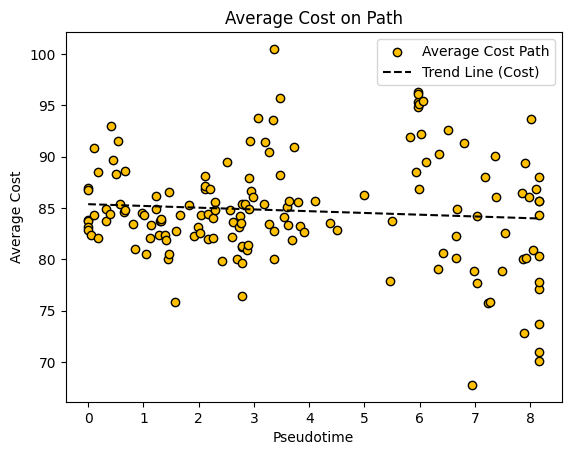

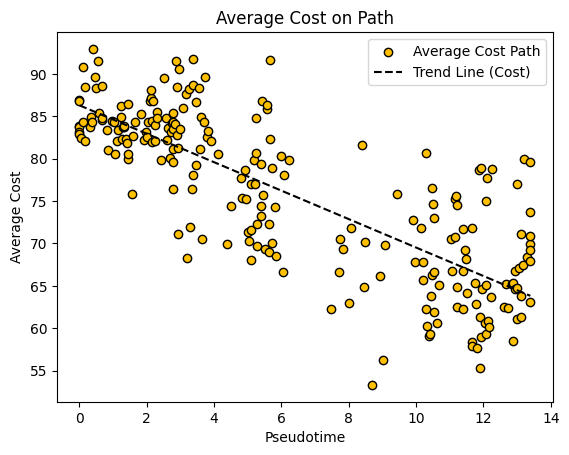

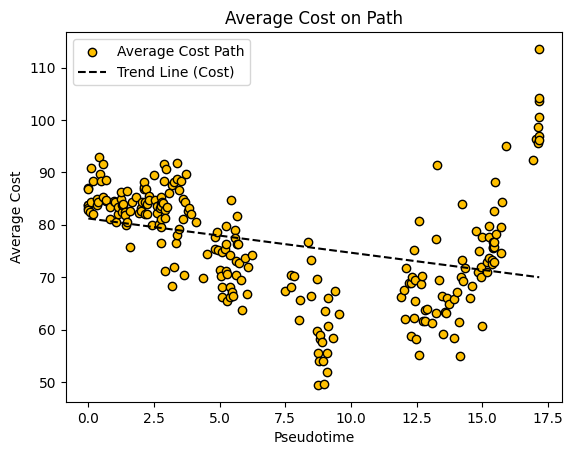

In [89]:
gfi1_eryt = warping_gfi1[3][0]
gfi1_mono = warping_gfi1[3][1]
gfi1_gran = warping_gfi1[3][2]

gfi1_eryt = dynchro.tl.avg_cost_path(gfi1_eryt, dtw_key="gfi1_erythrocytic_gfi1")
gfi1_mono = dynchro.tl.avg_cost_path(gfi1_mono, dtw_key="gfi1_monocytic_gfi1")
gfi1_gran = dynchro.tl.avg_cost_path(gfi1_gran, dtw_key="gfi1_granulocytic_gfi1")

dynchro.pl.plot_avg_cost_path(gfi1_eryt, pseudotime_key="pseudotime", dtw_key="gfi1_erythrocytic_gfi1")
dynchro.pl.plot_avg_cost_path(gfi1_mono, pseudotime_key="pseudotime", dtw_key="gfi1_monocytic_gfi1")
dynchro.pl.plot_avg_cost_path(gfi1_gran, pseudotime_key="pseudotime", dtw_key="gfi1_granulocytic_gfi1")

## 2.1 2x2 plot

In [99]:
def norm(x):
    return (x - x.min()) / (x.max() - x.min())

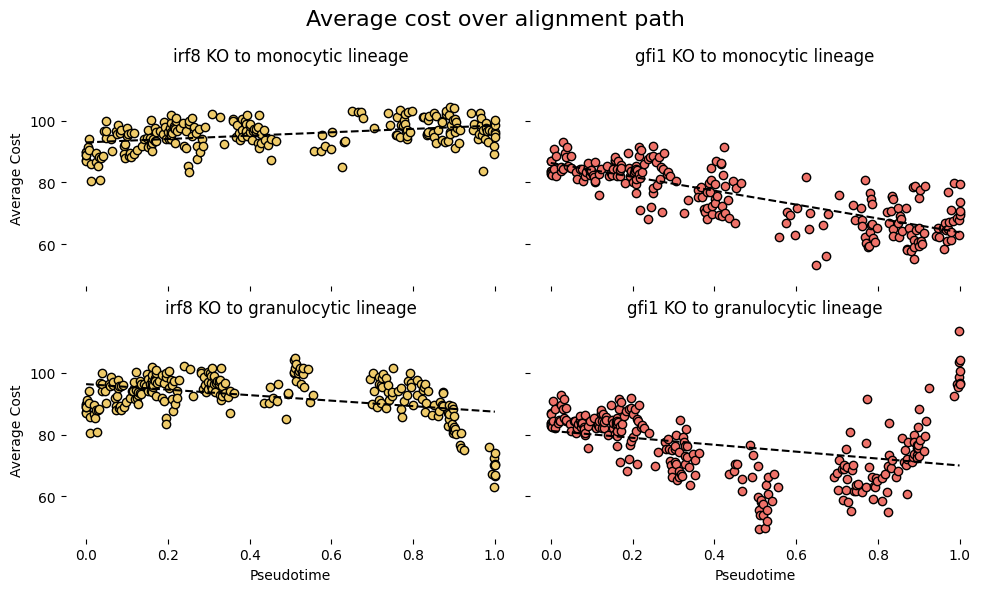

In [103]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6), sharey=True, sharex=True)

irf8_mono.obs["norm_pseudotime"] = norm(irf8_mono.obs["pseudotime"])
irf8_gran.obs["norm_pseudotime"] = norm(irf8_gran.obs["pseudotime"])
gfi1_mono.obs["norm_pseudotime"] = norm(gfi1_mono.obs["pseudotime"])
gfi1_gran.obs["norm_pseudotime"] = norm(gfi1_gran.obs["pseudotime"])

# irf8_mono.obs["norm_pseudotime"] = (irf8_mono.obs["pseudotime"] - irf8_mono.obs["pseudotime"].min()) / (irf8_mono.obs["pseudotime"].max() - irf8_mono.obs["pseudotime"].min())
# irf8_gran.obs["norm_pseudotime"] = (irf8_gran.obs["pseudotime"] - irf8_gran.obs["pseudotime"].min()) / (irf8_gran.obs["pseudotime"].max() - irf8_gran.obs["pseudotime"].min())
# gfi1_mono.obs["norm_pseudotime"] = (gfi1_mono.obs["pseudotime"] - gfi1_mono.obs["pseudotime"].min()) / (gfi1_mono.obs["pseudotime"].max() - gfi1_mono.obs["

dynchro.pl.plot_avg_cost_path(irf8_mono, pseudotime_key="norm_pseudotime", dtw_key="irf8_monocytic_irf8", color = "#EFCB69", ax=axs[0,0])
dynchro.pl.plot_avg_cost_path(irf8_gran, pseudotime_key="norm_pseudotime", dtw_key="irf8_granulocytic_irf8", color = "#EFCB69", ax=axs[1,0])
dynchro.pl.plot_avg_cost_path(gfi1_mono, pseudotime_key="norm_pseudotime", dtw_key="gfi1_monocytic_gfi1", color="#EF7269", ax=axs[0,1])
dynchro.pl.plot_avg_cost_path(gfi1_gran, pseudotime_key="norm_pseudotime", dtw_key="gfi1_granulocytic_gfi1", color="#EF7269", ax=axs[1,1])

axs[0, 0].spines[['top', 'right', 'bottom', 'left']].set_visible(False)
axs[0, 1].spines[['top', 'right', 'bottom', 'left']].set_visible(False)
axs[1, 0].spines[['top', 'right', 'bottom', 'left']].set_visible(False)
axs[1, 1].spines[['top', 'right', 'bottom', 'left']].set_visible(False)

axs[0,0].get_legend().remove()
axs[0,1].get_legend().remove()
axs[1,0].get_legend().remove()
axs[1,1].get_legend().remove()

axs[0, 0].set_title("irf8 KO to monocytic lineage")
axs[1, 0].set_title("irf8 KO to granulocytic lineage")
axs[0, 1].set_title("gfi1 KO to monocytic lineage")
axs[1, 1].set_title("gfi1 KO to granulocytic lineage")

axs[0, 0].xaxis.label.set_visible(False)
axs[0, 1].xaxis.label.set_visible(False)
axs[0, 1].yaxis.label.set_visible(False)
axs[1, 1].yaxis.label.set_visible(False)

fig.tight_layout()
fig.suptitle("Average cost over alignment path", fontsize=16)
fig.subplots_adjust(top=0.88)

# 3. bootstrapping

In [101]:
import pickle
with open("figures/2_dynchro_bootstrap_results.pkl", "rb") as f:
    res_irf8, res_gfi1, res_both = pickle.load(f)

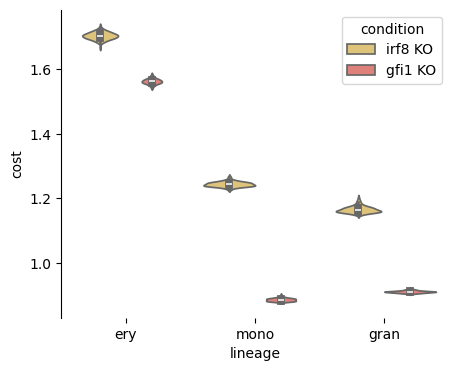

In [117]:
import pandas as pd

data_irf8 = pd.DataFrame({
    "ery": res_irf8[0],
    "mono": res_irf8[1],
    "gran": res_irf8[2]
})

data_gfi1 = pd.DataFrame({
    "ery": res_gfi1[0],
    "mono": res_gfi1[1],
    "gran": res_gfi1[2]
})

# append data_irf8 and data_gfi1 to a single dataframe with a column indicating the condition
data_irf8["condition"] = "irf8 KO"
data_gfi1["condition"] = "gfi1 KO"
# concatenate the two dataframes
data = pd.concat([data_irf8, data_gfi1], ignore_index=True)
# melt the dataframe to have a column for the lineage and a column for the cost
data = pd.melt(data, id_vars=["condition"], value_vars=["ery", "mono", "gran"], var_name="lineage", value_name="cost")

fig, axes = plt.subplots(1, 1, figsize=(5, 4), sharey=True)

import seaborn as sns
# sns.violinplot(data=data_irf8, palette=["#EFCB69", "#EFCB69", "#EFCB69"], ax=axes[0])
import matplotlib.pyplot as plt
# sns.violinplot(data=data_gfi1, palette=["#EF7269", "#EF7269", "#EF7269"], ax=axes[1])
# plt.show()

# axes[0].spines[['top', 'right', 'bottom']].set_visible(False)
# axes[1].spines[['top', 'right', 'bottom', 'left']].set_visible(False)

# fig.tight_layout()

sns.violinplot(data=data, y="cost", hue="condition", x="lineage", palette=["#EFCB69", "#EF7269"])
axes.spines[['top', 'right', 'bottom']].set_visible(False)

In [33]:
data

,condition,lineage,cost
0,irf8 KO,ery,1.694400
1,irf8 KO,ery,1.693376
2,irf8 KO,ery,1.703421
3,irf8 KO,ery,1.715717
4,irf8 KO,ery,1.710848
...,...,...,...
595,gfi1 KO,gran,0.910992
596,gfi1 KO,gran,0.905136
597,gfi1 KO,gran,0.913079
598,gfi1 KO,gran,0.911015


# 4. warping plots

In [193]:
with open("figures/2_dynchro_warpings_warpedfig_irf8.pkl", "rb") as f:
    warped_irf8, irf8_erythrocytic, irf8_monocytic, irf8_granulocytic = pickle.load(f)

with open("figures/2_dynchro_warpings_warpedfig_gfi1.pkl", "rb") as f:
    warped_gfi1, gfi1_erythrocytic, gfi1_monocytic, gfi1_granulocytic = pickle.load(f)

In [143]:
def flatten(values : list) -> list:
    """
    Flatten a list of lists into a single list.
    """
    flat_list = []

    for sublist in values:
        if isinstance(sublist, list):
            # If the item is a list, extend the result with its contents
            flat_list.extend(sublist)
        else:
            # If the item is not a list, append it directly if it is not None
            if sublist is not None:
                flat_list.append(sublist)

    return flat_list

In [306]:
def plot_warping(
        warped_datasets,
        extra_datasets = None,
        pseudotime_key: str = "pseudotime",
        dtw_key: str = "dtw",
        dimred_key: str = "X_umap",
        yshift = 0,
        ax = None,
        colors = None
):
# fix legends as well
    if ax is None:
        fig, ax = plt.subplots(figsize=(10.1, 3))

    # check only two warped datasets are provided
    assert  len(warped_datasets) <= 2, "Only two warped datasets are supported for plotting."

    # colors = ["#ff681c", "#1b2944", "#3abbba", "#315b25"]
    # colors = ['#6fa8dc','#93c47d','#ffc000','#c5504b','#c27ba0','#a64d79','#8e7cc3','#34495e']
    # colors = [ "#EF7269", "#EFCB69", "#69EF72",  "#69BAEF", "#7269EF", "#CB69EF"]
    datasets = warped_datasets + extra_datasets if extra_datasets else warped_datasets

    yshifts = [yshift] + [0] * (len(datasets) - 1)
    # print(yshifts)
    for dataset, color, yshift_ in zip(datasets, colors, yshifts):
        # print(ift_)
        dimred = dataset.obsm[dimred_key]
        pseudotime = norm(dataset.obs[pseudotime_key])
        ax.scatter(pseudotime, dimred[:, 1] + yshift_, c=color, edgecolors="black", linewidths=1.1, s=60)

    warping1 = flatten(warped_datasets[0].obs[f"{dtw_key}_path"])
    warping2 = flatten(warped_datasets[1].obs[f"{dtw_key}_path"])

    ds1_x = norm(warped_datasets[0].obs[pseudotime_key])[warping2]
    ds1_y = warped_datasets[0].obsm[dimred_key][warping2, 1] + yshifts[0]
    ds2_x = norm(warped_datasets[1].obs[pseudotime_key])[warping1]
    ds2_y = warped_datasets[1].obsm[dimred_key][warping1, 1]

    for x1, y1, x2, y2 in zip(ds1_x, ds1_y, ds2_x, ds2_y):
        ax.plot([x1, x2], [y1, y2], color='black', alpha = 0.2)

    ax.legend()

    ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
    x0 = ax.get_xlim()[0]
    y0 = ax.get_ylim()[0]

    ax.arrow(x0, y0 - 2, 3, 0, head_width=0.5, head_length=0.1, fc='k', ec='k')

    ax.set_xlabel("Pseudotime")
    ax.xaxis.set_label_coords(0.11, 0.02)

    ax.set_xticks([])
    ax.set_yticks([])

    ax.legend()

    return ax


/tmp/ipykernel_1162920/586566030.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ds1_x = norm(warped_datasets[0].obs[pseudotime_key])[warping2]
/tmp/ipykernel_1162920/586566030.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ds2_x = norm(warped_datasets[1].obs[pseudotime_key])[warping1]
/tmp/ipykernel_1162920/586566030.py:42: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/tmp/ipykernel_1162920/586566030.py:56: UserWarning: No artists with labels found to put in legend.  N

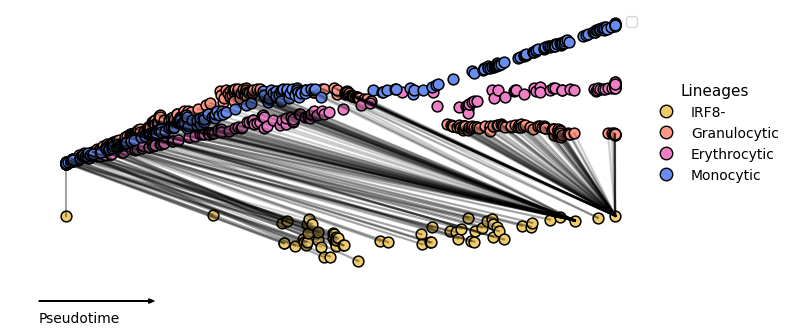

In [181]:
fig, axes = plt.subplots(figsize=(10.1, 4), nrows=1, ncols=2, width_ratios=[9, 1.1])

colors = ["#EFCB69","#CB69EF" , "#EF7269",  "#69BAEF", "#EF69BA", "#7269EF", "#69EF72"]
colors = [
    "#EFCB69",
    "#FF9784",
    "#EE7FC7",
    "#698DEF"
    ]

ax = plot_warping(
    warped_datasets = [warped_irf8, irf8_granulocytic],
    extra_datasets = [irf8_erythrocytic, irf8_monocytic],
    dtw_key = "irf8_granulocytic_irf8",
    dimred_key = "X_vis_umap",
    yshift = -15,
    ax=axes[0],
    colors = colors
)
handles = [plt.Line2D([0], [0], marker='o', markerfacecolor=c, color = "k", markersize = 9, lw = 0) for c in colors[:4]]
labels = ["IRF8-", "Granulocytic", "Erythrocytic", "Monocytic"]

# no spines and ticks
ax = axes[1]
ax.axis('off')

axes[1].legend(
    handles=handles, labels=labels, frameon=False, loc='center', fontsize=10,
    bbox_to_anchor=(0, 0.6), title="Lineages", title_fontsize=11
)



[-8, 0, 0, 0]
-8
0
0
0


/tmp/ipykernel_1162920/3691110444.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ds1_x = norm(warped_datasets[0].obs[pseudotime_key])[warping2]
/tmp/ipykernel_1162920/3691110444.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ds2_x = norm(warped_datasets[1].obs[pseudotime_key])[warping1]
/tmp/ipykernel_1162920/3691110444.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/tmp/ipykernel_1162920/3691110444.py:54: UserWarning: No artists with labels found to put in legend

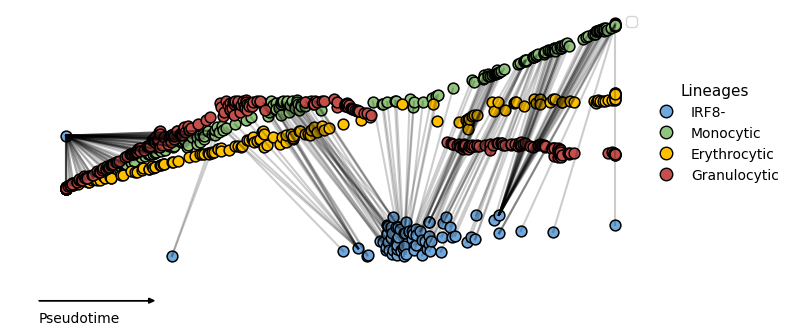

In [163]:
fig, axes = plt.subplots(figsize=(10.1, 4), nrows=1, ncols=2, width_ratios=[9, 1.1])


ax = plot_warping(
    warped_datasets = [warped_GFI1, monocytic],
    extra_datasets = [erythrocytic, granulocytic],
    dtw_key = "gfi1_monocytic_gfi1",
    dimred_key = "X_vis_umap",
    yshift = -8,
    ax=axes[0]
)
colors = ['#6fa8dc','#93c47d','#ffc000','#c5504b','#c27ba0','#a64d79','#8e7cc3','#34495e']

handles = [plt.Line2D([0], [0], marker='o', markerfacecolor=c, color = "k", markersize = 9, lw = 0) for c in colors[:4]]
labels = ["IRF8-", "Monocytic", "Erythrocytic", "Granulocytic"]

# no spines and ticks
ax = axes[1]
ax.axis('off')

axes[1].legend(handles=handles, labels=labels, frameon=False, loc='center', fontsize=10,
               bbox_to_anchor=(0, 0.6), title="Lineages", title_fontsize=11)

fig.savefig("figures/2_dynchro_warping_irf8.pdf", bbox_inches='tight', dpi=300)
fig.savefig("figures/2_dynchro_warping_irf8.png", bbox_inches='tight', dpi=300)
plt.show()

# 5. combine all plots

In [118]:
import matplotlib.pyplot as plt
import numpy as np


# Helper function used for visualization in the following examples
def identify_axes(ax_dict, fontsize=48):
    """
    Helper to identify the Axes in the examples below.

    Draws the label in a large font in the center of the Axes.

    Parameters
    ----------
    ax_dict : dict[str, Axes]
        Mapping between the title / label and the Axes.
    fontsize : int, optional
        How big the label should be.
    """
    kw = dict(ha="center", va="center", fontsize=fontsize, color="darkgrey")
    for k, ax in ax_dict.items():
        ax.text(0.5, 0.5, k, transform=ax.transAxes, **kw)

/tmp/ipykernel_1162920/1248426319.py:42: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/tmp/ipykernel_1162920/1248426319.py:56: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


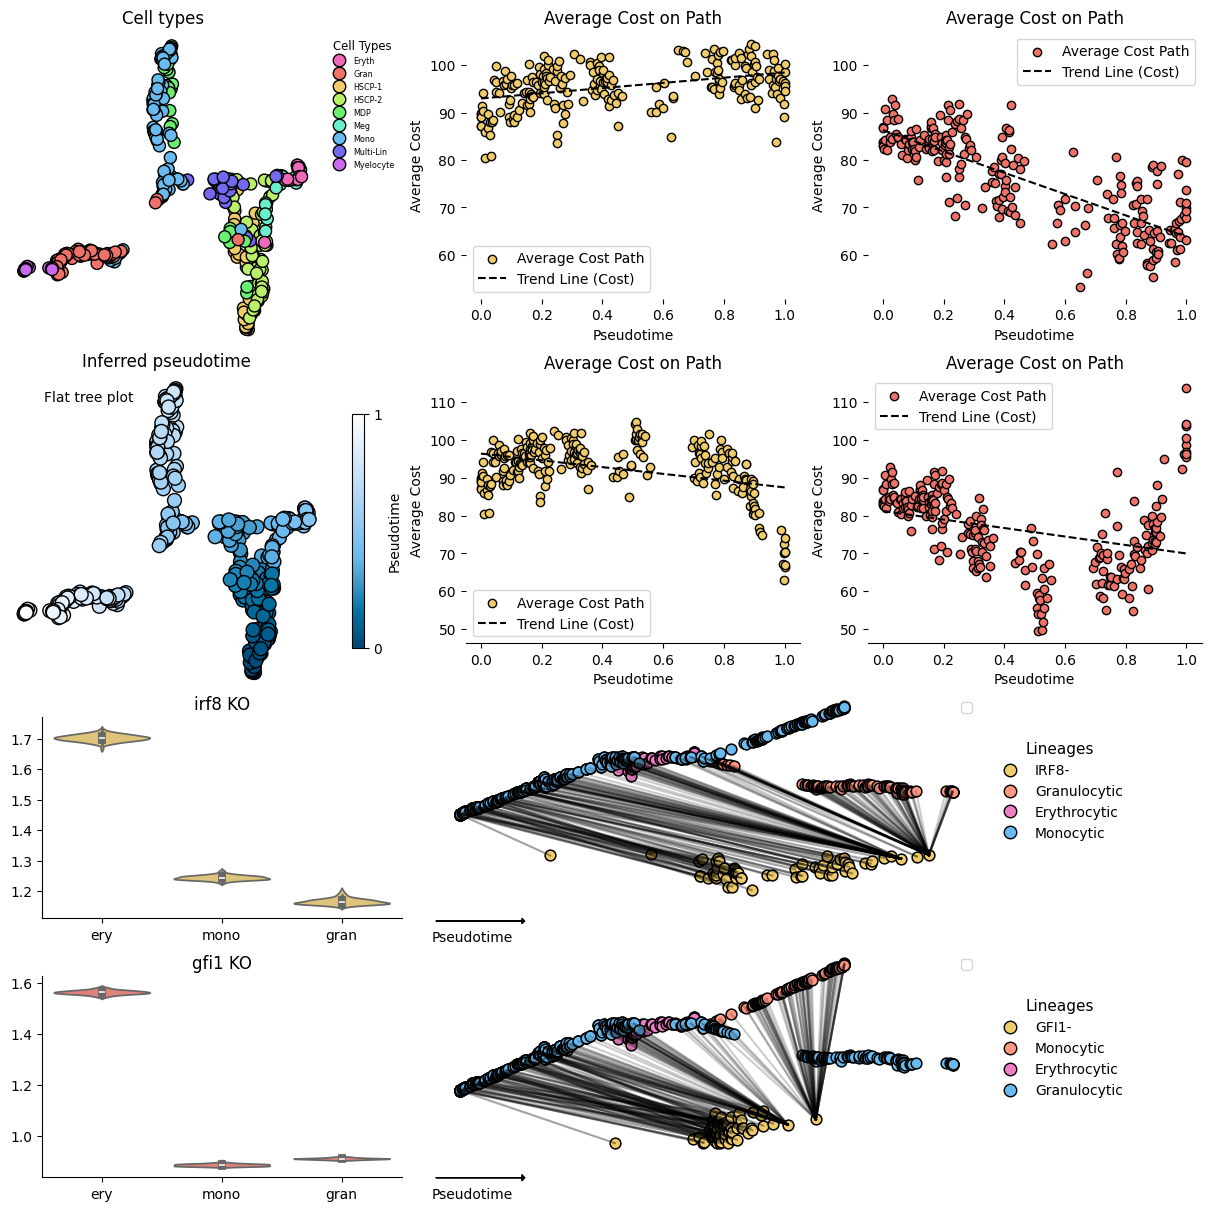

In [308]:
fig = plt.figure(figsize=(12, 12), layout="constrained")
gs_outer = fig.add_gridspec(2, 2, width_ratios=[1, 2], height_ratios=[2, 1.5])

gsa = gs_outer[0, 0].subgridspec(2, 1, height_ratios=[1, 1], wspace=0.1)
gsb = gs_outer[0, 1].subgridspec(2, 2, width_ratios=[1, 1], height_ratios=[1, 1])
gsc = gs_outer[1, 0].subgridspec(2, 1, height_ratios=[1, 1], wspace=0.1)
gsd = gs_outer[1, 1].subgridspec(2, 1, height_ratios=[1, 1], wspace=0.1)

gsa1 = gsa[0, 0].subgridspec(1, 2, width_ratios=[20, 1])
gsa2 = gsa[1, 0].subgridspec(1, 2, width_ratios=[20, 1])

axa11 = fig.add_subplot(gsa1[0, 0])
axa12 = fig.add_subplot(gsa1[0, 1])
axa21 = fig.add_subplot(gsa2[0, 0])
axa22 = fig.add_subplot(gsa2[0, 1])

plot_celltypes(adata, [ axa11, axa12])
plot_pseudotime(adata, [axa21, axa22], "Inferred pseudotime")

axb1 = fig.add_subplot(gsb[0, 0])
axb2 = fig.add_subplot(gsb[0, 1], sharey=axb1)
axb3 = fig.add_subplot(gsb[1, 0], sharex=axb1)
axb4 = fig.add_subplot(gsb[1, 1], sharex=axb2, sharey=axb3)

dynchro.pl.plot_avg_cost_path(irf8_mono, pseudotime_key="norm_pseudotime", dtw_key="irf8_monocytic_irf8", color = "#EFCB69", ax=axb1)
dynchro.pl.plot_avg_cost_path(irf8_gran, pseudotime_key="norm_pseudotime", dtw_key="irf8_granulocytic_irf8", color = "#EFCB69", ax=axb3)
dynchro.pl.plot_avg_cost_path(gfi1_mono, pseudotime_key="norm_pseudotime", dtw_key="gfi1_monocytic_gfi1", color="#EF7269", ax=axb2)
dynchro.pl.plot_avg_cost_path(gfi1_gran, pseudotime_key="norm_pseudotime", dtw_key="gfi1_granulocytic_gfi1", color="#EF7269", ax=axb4)

axb1.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
axb2.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
axb3.spines[['top', 'right', 'left']].set_visible(False)
axb4.spines[['top', 'right', 'left']].set_visible(False)

axc1 = fig.add_subplot(gsc[0, 0])
axc2 = fig.add_subplot(gsc[1, 0])

axc1.set_title("irf8 KO")
axc2.set_title("gfi1 KO")

axc1.spines[['top', 'right']].set_visible(False)
axc2.spines[['top', 'right']].set_visible(False)

sns.violinplot(data=data_irf8, palette=["#EFCB69", "#EFCB69", "#EFCB69"], ax=axc1)
sns.violinplot(data=data_gfi1, palette=["#EF7269", "#EF7269", "#EF7269"], ax=axc2)

# add gridspec to gsd
gsd1 = gsd[0, 0].subgridspec(1, 2, width_ratios=[8, 2])
gsd2 = gsd[1, 0].subgridspec(1, 2, width_ratios=[8, 2])

axd11 = fig.add_subplot(gsd1[0, 0])
axd12 = fig.add_subplot(gsd1[0, 1])
axd21 = fig.add_subplot(gsd2[0, 0])
axd22 = fig.add_subplot(gsd2[0, 1])

colors_warping = [
    "#EFCB69",
    "#FF9784",
    "#EE7FC7",
    "#69BAEF"
    ]

plot_warping(
    warped_datasets = [warped_irf8, irf8_granulocytic],
    extra_datasets = [irf8_erythrocytic, irf8_monocytic],
    dtw_key = "irf8_granulocytic_irf8",
    dimred_key = "X_vis_umap",
    yshift = -15,
    ax=axd11,
    colors = colors_warping
)
handles = [plt.Line2D([0], [0], marker='o', markerfacecolor=c, color = "k", markersize = 9, lw = 0) for c in colors_warping[:4]]
labels = ["IRF8-", "Granulocytic", "Erythrocytic", "Monocytic"]

# no spines and ticks
axd12.axis('off')
axd12.legend(
    handles=handles, labels=labels, frameon=False, loc='center', fontsize=10,
    bbox_to_anchor=(0, 0.6), title="Lineages", title_fontsize=11
)

plot_warping(
    warped_datasets = [warped_gfi1, gfi1_monocytic],
    extra_datasets = [gfi1_erythrocytic, gfi1_granulocytic],
    dtw_key = "gfi1_monocytic_gfi1",
    dimred_key = "X_vis_umap",
    yshift = -8,
    ax=axd21,
    colors = colors_warping
)

handles = [plt.Line2D([0], [0], marker='o', markerfacecolor=c, color = "k", markersize = 9, lw = 0) for c in colors_warping[:4]]
labels = ["GFI1-", "Monocytic", "Erythrocytic", "Granulocytic"]
axd22.axis('off')
axd22.legend(
    handles=handles, labels=labels, frameon=False, loc='center', fontsize=10,
    bbox_to_anchor=(0, 0.6), title="Lineages", title_fontsize=11
)

# save figure
fig.savefig("figures/dynchro_mouse.pdf", bbox_inches='tight', dpi=300)
fig.savefig("figures/dynchro_mouse.png", bbox_inches='tight', dpi=300)


<Axes: label='c2'>

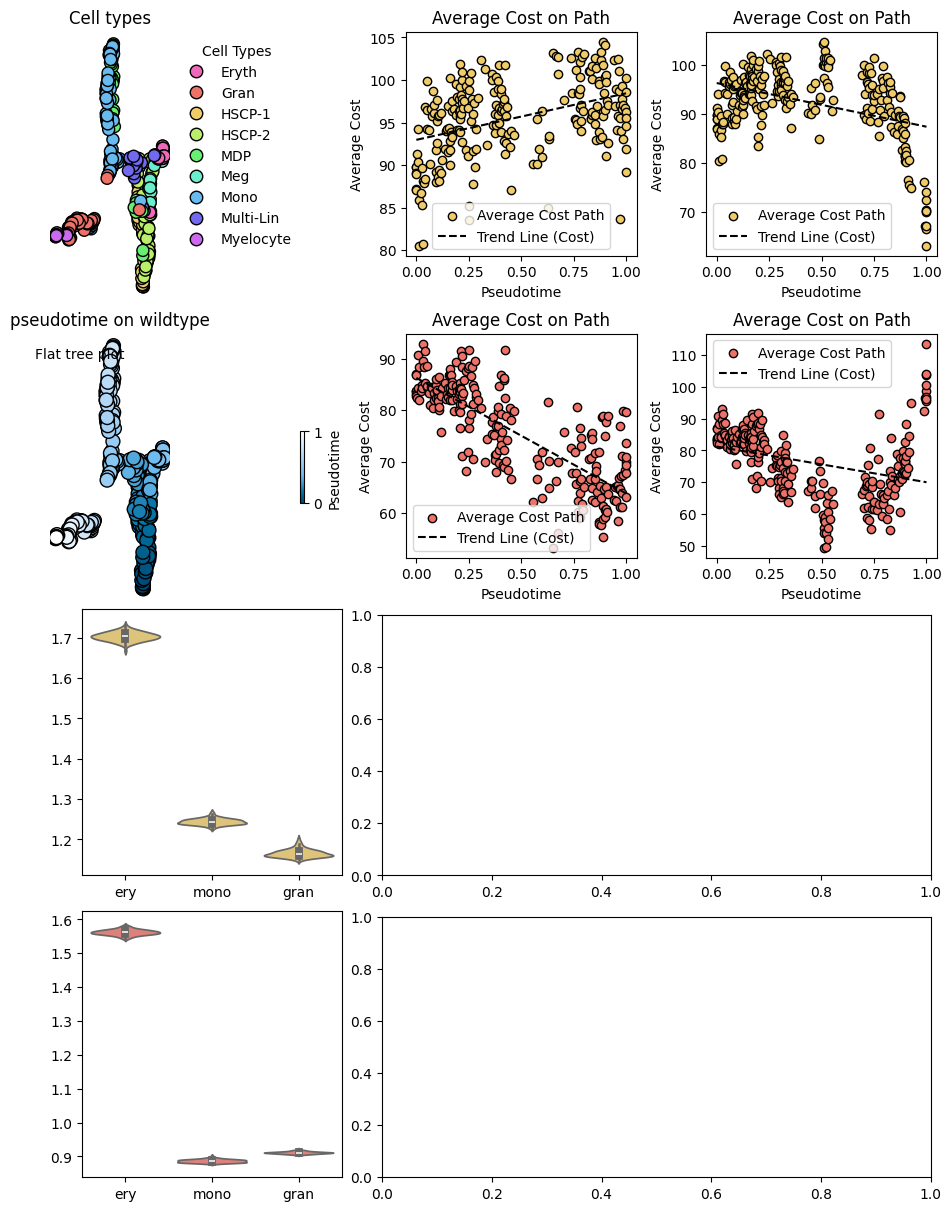

In [ ]:
scatters = [["a1"], ["a2"]]
costs = [["b1", "b2"], ["b3", "b4"]]
bootstraps = [["c1"], ["c2"]]
warpings = [["d1"], ["d2"]]

outer_nested = [
    [scatters, costs],
    [bootstraps, warpings]
]




axd = plt.figure(figsize=(9, 12), layout="constrained").subplot_mosaic(
    outer_nested, empty_sentinel=None,
    width_ratios=[1, 2]
)

plot_celltypes(adata, axd["a1"])
plot_pseudotime(adata, axd["a2"], "pseudotime on wildtype")

dynchro.pl.plot_avg_cost_path(irf8_mono, pseudotime_key="norm_pseudotime", dtw_key="irf8_monocytic_irf8", color = "#EFCB69", ax=axd["b1"])
dynchro.pl.plot_avg_cost_path(irf8_gran, pseudotime_key="norm_pseudotime", dtw_key="irf8_granulocytic_irf8", color = "#EFCB69", ax=axd["b2"])
dynchro.pl.plot_avg_cost_path(gfi1_mono, pseudotime_key="norm_pseudotime", dtw_key="gfi1_monocytic_gfi1", color="#EF7269", ax=axd["b3"])
dynchro.pl.plot_avg_cost_path(gfi1_gran, pseudotime_key="norm_pseudotime", dtw_key="gfi1_granulocytic_gfi1", color="#EF7269", ax=axd["b4"])

sns.violinplot(data=data_irf8, palette=["#EFCB69", "#EFCB69", "#EFCB69"], ax=axd["c1"])
sns.violinplot(data=data_gfi1, palette=["#EF7269", "#EF7269", "#EF7269"], ax=axd["c2"])
# identify_axes(axd, fontsize=36)

In [121]:
axd

{'a1': <Axes: label='a1'>,
 'a2': <Axes: label='a2'>,
 'b1': <Axes: label='b1'>,
 'b2': <Axes: label='b2'>,
 'b3': <Axes: label='b3'>,
 'b4': <Axes: label='b4'>,
 'c1': <Axes: label='c1'>,
 'c2': <Axes: label='c2'>,
 'd1': <Axes: label='d1'>,
 'd2': <Axes: label='d2'>}

In [199]:
adata

AnnData object with n_obs × n_vars = 382 × 500
    obs: 'label', 'n_counts', 'n_genes', 'pct_genes', 'kmeans', 'node', 'branch_id', 'branch_id_alias', 'branch_lam', 'branch_dist', 'S0_pseudotime', 'S3_pseudotime', 'S5_pseudotime', 'S4_pseudotime', 'S2_pseudotime', 'S1_pseudotime', 'branch_id_id', 'pseudotime', 'milestones', 'erythrocytic', 'monocytic', 'granulocytic'
    var: 'n_counts', 'n_cells', 'pct_cells'
    uns: 'branch_id_alias_colors', 'id', 'label_colors', 'lineage_labels', 'lineages', 'var_genes', 'workdir'
    obsm: 'X_dr', 'X_mlle', 'X_spring', 'X_stream_S4', 'X_vis', 'X_vis_umap'